# Data Glacier Data Science:: Bank Marketing (Campaign) -- Group Project
# Bank Marketing (Campaign)
 

Problem Statement:

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

 

Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

In [ ]:
# Import the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing Data

In [ ]:
baf_df = pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [ ]:
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Cleaning

In [ ]:
baf_df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
print( f"No. of duplicated rows: {baf_df.duplicated().sum()}")

No. of duplicated rows: 12


In [ ]:
baf_df = baf_df.drop_duplicates()
baf_df.shape

(41176, 21)

# Model Building

### Data Transformation

In [ ]:
categorical_cols = baf_df.columns[baf_df.dtypes==object].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
#convert all categorical variables to numeric
baf_df[categorical_cols] = baf_df[categorical_cols].apply(lambda x: pd.factorize(x)[0])
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

<Axes: >

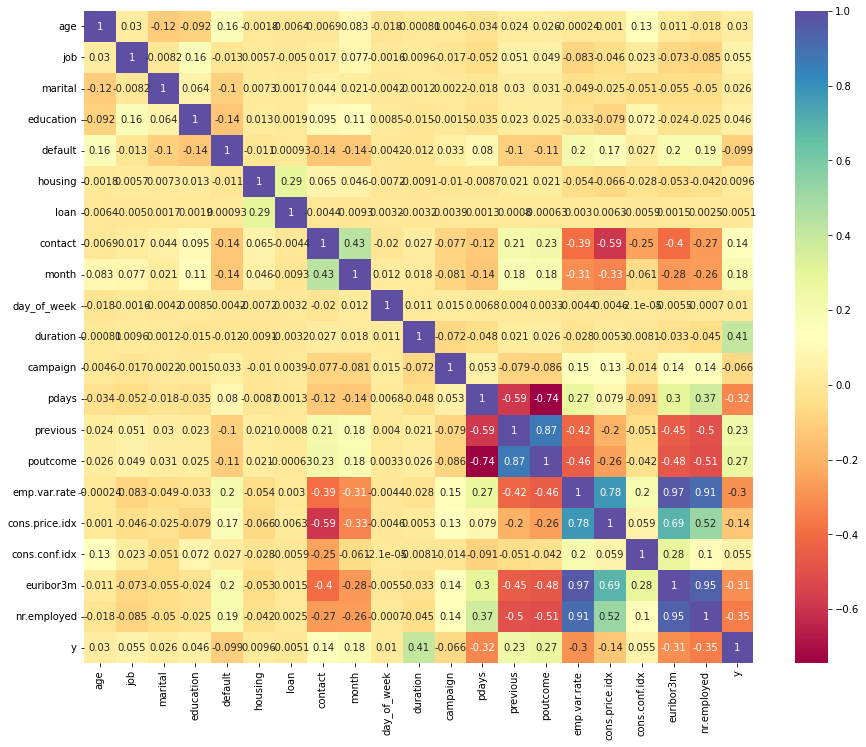

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(baf_df.corr(), annot=True, cmap='Spectral')

<Axes: title={'center': 'Correlation with response variable'}>

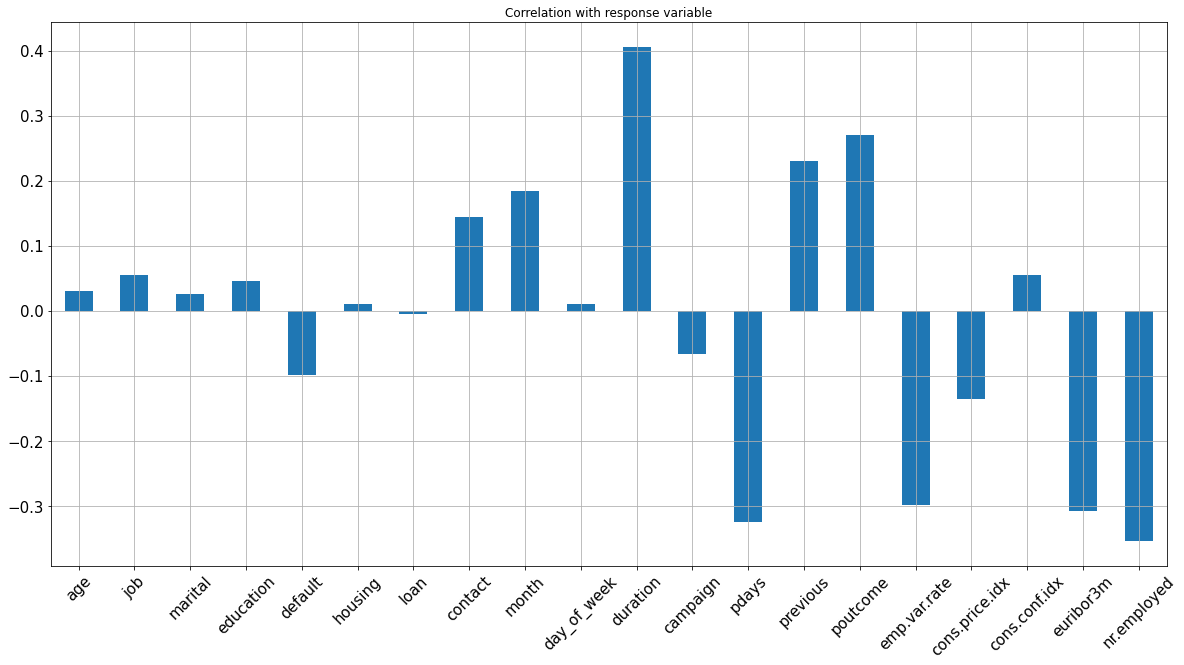

In [ ]:
baf_df.drop(columns = ['y']).corrwith(baf_df.y).plot.bar(
                        figsize=(20,10), title='Correlation with response variable', fontsize=15, rot=45, grid=True)

## Separating Independent and outcome varables

In [ ]:
X = baf_df.drop("y", axis=1)
y = baf_df["y"]

print(f"Shape of X: {X.shape} \nShape of y: {y.shape}")

Shape of X: (41176, 20) 
Shape of y: (41176,)


## Splitting the data

We will be splitting out dataset into train and test datasets before doing any encoding or feature engineering to avoid data leakage problem.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (32940, 20)
X_test: (8236, 20)
y_train: (32940,)
y_test: (8236,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Model Building

###Logistic Regression

In [ ]:
# with "duration" column

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(random_state = 42, class_weight='balanced', penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)


In [ ]:
results = pd.DataFrame([["Logistic Regression (with Duration)",accuracy,precision,recall, f1, roc_auc]],
                       columns = ['Model','Accuracy','Precision','Recall','f1 score','ROC_AUC'])
results                       

,Model,Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression (with Duration),0.857941,0.423996,0.877528,0.571742,0.866548


In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=model, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)
print(rfe.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [ ]:
X_train.columns[rfe.support_]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=["features"]),
          pd.DataFrame(np.transpose(model.coef_), columns=["coef"])],
          axis=1)

,features,coef
0,age,0.037456
1,job,0.058793
2,marital,0.023823
3,education,0.123969
4,default,-0.183377
5,housing,0.021337
6,loan,-0.018963
7,contact,0.313297
8,month,0.345071
9,day_of_week,-0.020535


###SVM (linear)

In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=42, kernel = 'linear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [ ]:
model_result = pd.DataFrame([["SVC (linear)",accuracy,precision,recall, f1, roc_auc]],
                       columns = ['Model','Accuracy','Precision','Recall','f1 score','ROC_AUC'])
results = results.append(model_result, ignore_index=True)
results 

<ipython-input-19-5b8e46458dd4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


,Model,Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression (with Duration),0.856119,0.416803,0.868182,0.563214,0.861429
1,SVC (linear),0.845920,0.400816,0.893182,0.553326,0.866724


###SVM (rbf)

In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=42,class_weight='balanced', kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [ ]:
model_result = pd.DataFrame([["SVC (rbf)",accuracy,precision,recall, f1, roc_auc]],
                       columns = ['Model','Accuracy','Precision','Recall','f1 score','ROC_AUC'])
results = results.append(model_result, ignore_index=True)
results 

<ipython-input-21-7bc3e3ce2459>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


,Model,Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression (with Duration),0.856119,0.416803,0.868182,0.563214,0.861429
1,SVC (linear),0.845920,0.400816,0.893182,0.553326,0.866724
2,SVC (rbf),0.844828,0.401583,0.922727,0.559614,0.879118


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=200, criterion='entropy', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [ ]:
model_result = pd.DataFrame([["Random Forest (n=200)",accuracy,precision,recall, f1, roc_auc]],
                       columns = ['Model','Accuracy','Precision','Recall','f1 score','ROC_AUC'])
results = results.append(model_result, ignore_index=True)
results 

<ipython-input-23-39629970de5c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


,Model,Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression (with Duration),0.856119,0.416803,0.868182,0.563214,0.861429
1,SVC (linear),0.845920,0.400816,0.893182,0.553326,0.866724
2,SVC (rbf),0.844828,0.401583,0.922727,0.559614,0.879118
3,Random Forest (n=200),0.913429,0.630265,0.459091,0.531229,0.713436


In [ ]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= model, X= X_train, y=y_train, cv=10)

print("Random forest classifer accuracy: %0.2f" %(accuracies.mean()))

Random forest classifer accuracy: 0.91


### XGBoost

In [ ]:
from sklearn.utils import class_weight
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, max_depth=10, learning_rate=0.2)
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [ ]:
model_result = pd.DataFrame([["XGBoost",accuracy,precision,recall, f1, roc_auc]],
                       columns = ['Model','Accuracy','Precision','Recall','f1 score','ROC_AUC'])
results = results.append(model_result, ignore_index=True)
results 

<ipython-input-26-582f0abce2ca>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


,Model,Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression (with Duration),0.856119,0.416803,0.868182,0.563214,0.861429
1,SVC (linear),0.845920,0.400816,0.893182,0.553326,0.866724
2,SVC (rbf),0.844828,0.401583,0.922727,0.559614,0.879118
3,Random Forest (n=200),0.913429,0.630265,0.459091,0.531229,0.713436
4,XGBoost,0.904201,0.556242,0.511364,0.532860,0.731280
